In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [8]:
#Independent and Dependent Features
x = df.iloc[: , :-1]
y = digits.target

In [9]:
print(x,y)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_5  pixel_6_6  \
0           0.0        0.0      

In [10]:
#Train and Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [11]:
print(x_train)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
428         0.0        0.0        0.0        1.0       12.0        7.0   
1357        0.0        0.0        1.0       15.0       15.0        2.0   
1185        0.0        1.0       12.0       15.0       16.0       13.0   
31          0.0        0.0        2.0       13.0        8.0        0.0   
1603        0.0        2.0       11.0       14.0       14.0        9.0   
...         ...        ...        ...        ...        ...        ...   
1130        0.0        1.0       13.0       16.0       16.0       12.0   
1294        0.0        3.0       15.0       16.0       15.0        3.0   
860         0.0        0.0        9.0       16.0       16.0       13.0   
1459        0.0        0.0        1.0       13.0       16.0       10.0   
1126        0.0        0.0        1.0       12.0       11.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_5  pixel_6_6  \
428         0.0        0.0      

In [12]:
from sklearn.tree import DecisionTreeClassifier
#Post Pruning
treemodel = DecisionTreeClassifier()
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.295703125, 0.9642857142857143, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1203\nvalue = [123, 127, 125, 127, 117, 109, 124, 117, 122, 112]'),
 Text(0.06171875, 0.8928571428571429, 'x[42] <= 5.0\ngini = 0.548\nsamples = 190\nvalue = [121, 0, 3, 1, 5, 16, 4, 0, 3, 37]'),
 Text(0.03125, 0.8214285714285714, 'x[21] <= 8.0\ngini = 0.409\nsamples = 49\nvalue = [0, 0, 1, 1, 0, 11, 0, 0, 0, 36]'),
 Text(0.01875, 0.75, 'x[26] <= 6.0\ngini = 0.292\nsamples = 12\nvalue = [0, 0, 1, 0, 0, 10, 0, 0, 0, 1]'),
 Text(0.0125, 0.6785714285714286, 'x[62] <= 6.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.00625, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.01875, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.025, 0.6785714285714286, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]'),
 Text(0.04375, 0.75, 'x[33] <= 1.5\ngini = 0.104\nsamples = 37\nvalue = [0

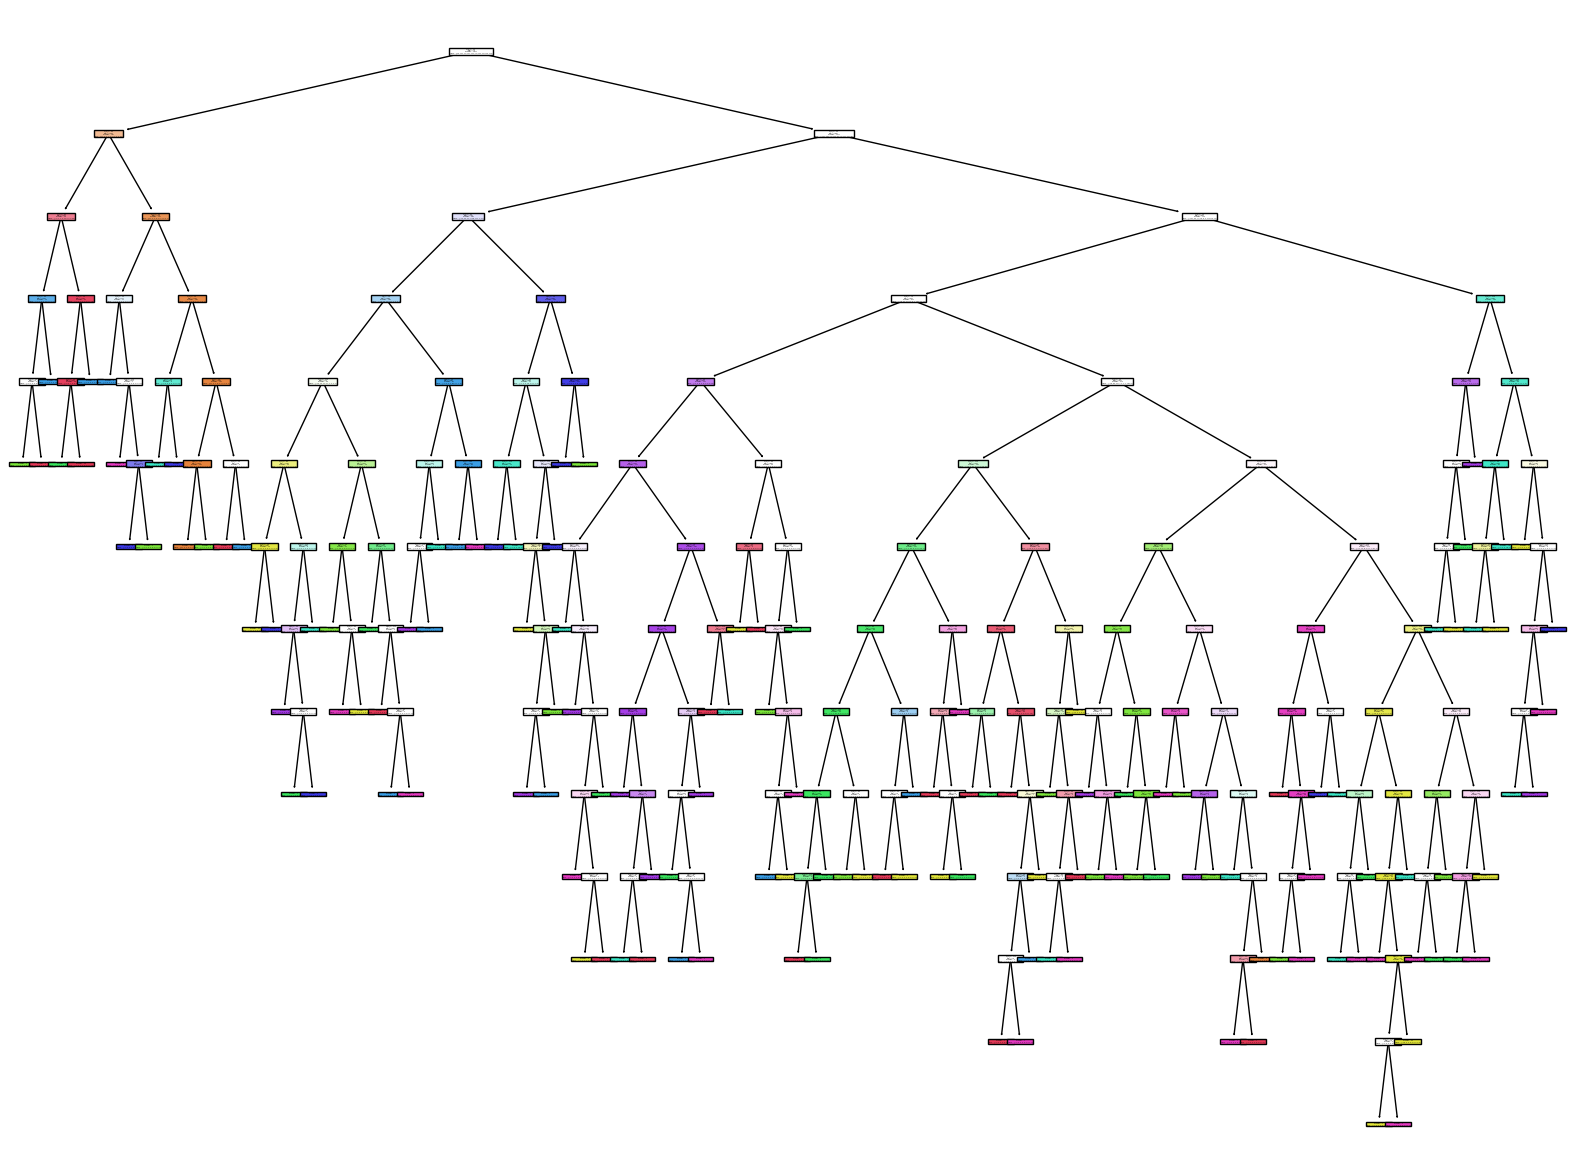

In [13]:
from sklearn import tree
plt.figure(figsize = (20,15))
tree.plot_tree(treemodel,filled = True)

[Text(0.43509615384615385, 0.9166666666666666, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1203\nvalue = [123, 127, 125, 127, 117, 109, 124, 117, 122, 112]'),
 Text(0.1778846153846154, 0.75, 'x[42] <= 5.0\ngini = 0.548\nsamples = 190\nvalue = [121, 0, 3, 1, 5, 16, 4, 0, 3, 37]'),
 Text(0.09615384615384616, 0.5833333333333334, 'x[21] <= 8.0\ngini = 0.409\nsamples = 49\nvalue = [0, 0, 1, 1, 0, 11, 0, 0, 0, 36]'),
 Text(0.057692307692307696, 0.4166666666666667, 'x[4] <= 8.0\ngini = 0.292\nsamples = 12\nvalue = [0, 0, 1, 0, 0, 10, 0, 0, 0, 1]'),
 Text(0.038461538461538464, 0.25, 'x[3] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.019230769230769232, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.057692307692307696, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]'),
 Text(

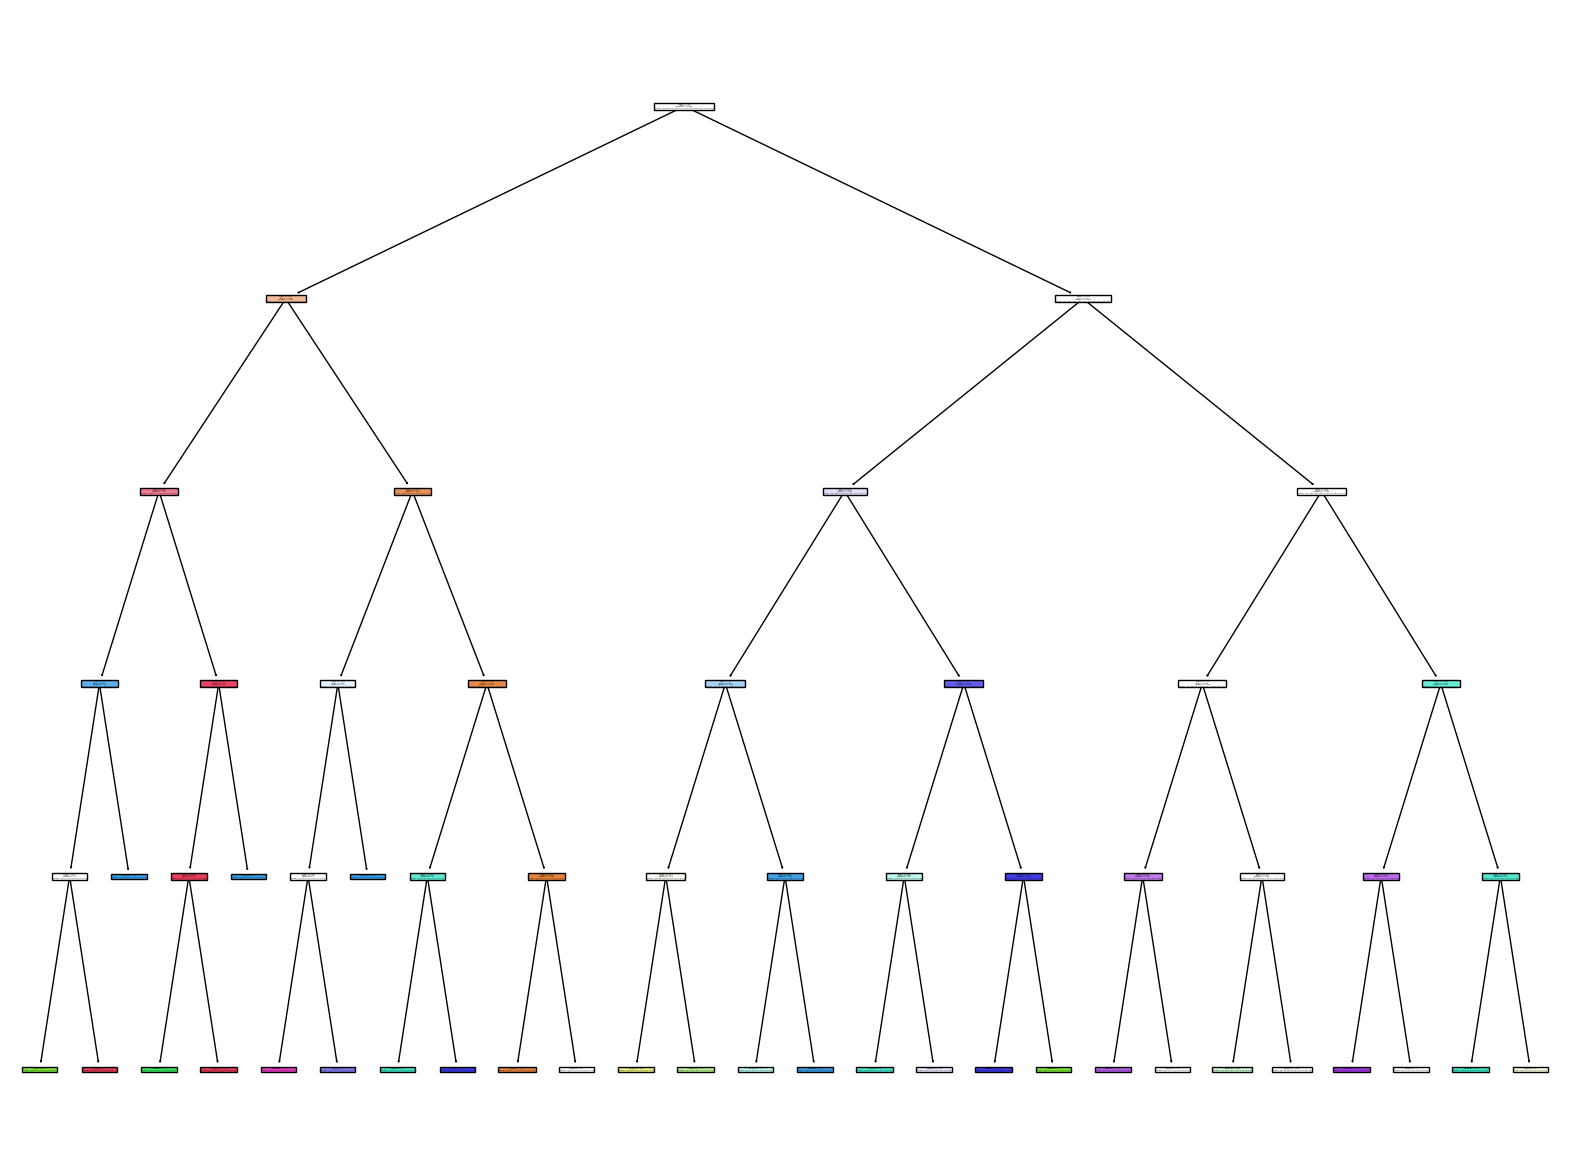

In [14]:
#on the basis of the the above Decision Tree now we apply the Post Prunning parameters
treemodel = DecisionTreeClassifier(max_depth = 5)
treemodel.fit(x_train,y_train)
plt.figure(figsize = (20,15))
tree.plot_tree(treemodel,filled = True)

In [15]:
y_pred = treemodel.predict(x_test)
print(y_pred)

[6 3 3 7 2 2 5 3 5 3 8 4 4 0 4 8 3 7 8 8 4 3 3 7 5 6 3 5 6 3 4 3 1 4 4 6 9
 4 7 6 6 3 6 3 6 8 3 0 6 5 5 8 3 5 6 0 3 0 0 8 5 4 3 2 4 5 7 0 7 5 3 5 5 4
 7 0 4 5 5 9 3 0 2 3 8 0 6 4 4 3 8 8 8 3 5 3 9 1 1 7 1 3 4 3 8 8 5 3 4 8 8
 7 4 6 4 9 8 7 3 7 8 6 3 4 0 2 5 7 5 3 7 5 7 3 0 6 6 4 8 8 0 3 4 6 3 3 6 9
 0 1 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 8 6 5 7 3 8 4 8 8 1 7 7 2 8 3 9 8 0 3
 8 8 5 6 3 9 4 4 8 4 8 3 6 4 3 5 3 5 7 8 3 4 8 1 5 4 4 3 6 8 8 6 0 4 5 8 7
 8 6 4 5 6 8 3 1 3 6 7 3 5 1 4 7 6 3 8 5 5 3 4 8 8 3 7 7 7 6 8 8 8 3 6 8 7
 3 6 0 3 7 7 0 8 0 4 5 8 5 3 6 0 8 1 0 0 3 6 5 3 7 8 5 5 3 5 7 5 3 2 8 0 5
 3 3 4 0 8 4 6 8 3 4 5 0 5 3 1 3 1 4 8 8 7 0 4 5 2 8 8 8 7 0 6 4 8 8 5 8 8
 4 5 8 4 3 3 6 0 1 8 0 7 3 8 9 5 2 7 7 3 8 7 4 3 8 3 5 6 0 0 3 0 3 0 0 4 8
 2 8 4 5 3 6 3 4 8 8 4 2 2 8 3 8 8 5 0 6 3 3 7 6 6 4 2 8 3 8 6 6 7 8 8 3 4
 0 5 3 9 7 5 7 6 3 8 0 5 3 7 5 3 7 4 8 2 9 0 7 5 8 3 6 3 3 6 3 5 0 8 5 5 8
 3 3 6 8 6 5 6 2 0 8 7 3 7 0 8 2 3 5 8 7 3 6 2 3 7 8 5 6 3 0 7 2 8 9 6 3 8
 0 0 2 9 3 7 5 3 7 7 8 3 

In [16]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print(score)

0.6885521885521886


In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       0.22      0.57      0.32        21
           2       0.29      0.62      0.39        24
           3       0.82      0.42      0.56       109
           4       0.77      0.82      0.79        60
           5       0.89      0.93      0.91        70
           6       0.96      0.87      0.92        63
           7       0.90      0.81      0.85        69
           8       0.79      0.38      0.51       108
           9       0.26      1.00      0.42        18

    accuracy                           0.69       594
   macro avg       0.69      0.74      0.66       594
weighted avg       0.79      0.69      0.70       594



In [18]:
parameter = {
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2'],
    }

In [19]:
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier()

In [20]:
cv = GridSearchCV(treemodel,param_grid = parameter,cv=5,scoring = 'accuracy')

In [21]:
cv.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [22]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [23]:
y_pred = cv.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.6734006734006734
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        65
           1       0.44      0.56      0.49        43
           2       0.58      0.56      0.57        54
           3       0.70      0.81      0.75        48
           4       0.70      0.78      0.74        58
           5       0.75      0.71      0.73        77
           6       0.84      0.59      0.69        82
           7       0.71      0.73      0.72        60
           8       0.33      0.40      0.36        42
           9       0.69      0.72      0.71        65

    accuracy                           0.67       594
   macro avg       0.67      0.66      0.66       594
weighted avg       0.69      0.67      0.68       594

